## pip install geopandas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file
flights = pd.read_csv('flights.csv', low_memory=False)

In [3]:
flights.shape

(5819079, 31)

In [4]:
null_counts = flights.isnull().sum()

# Print only columns with missing values
print("Columns with missing values and their count:")
print(null_counts[null_counts > 0])

# Optional: Show percentage of missing values in each column
missing_percentage = (null_counts / flights.shape[0]) * 100
print("\nPercentage of missing values in columns with missing data:")
print(missing_percentage[missing_percentage > 0])

Columns with missing values and their count:
TAIL_NUMBER              14721
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Percentage of missing values in columns with missing data:
TAIL_NUMBER             0.252978
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
WHEELS_ON               1.589822
TAXI_IN                 1.5

In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flights['AIR_SYSTEM_DELAY'].value_counts(dropna=False)

AIR_SYSTEM_DELAY
NaN      4755640
0.0       498613
1.0        28003
15.0       23199
2.0        22981
          ...   
437.0          1
624.0          1
699.0          1
850.0          1
477.0          1
Name: count, Length: 571, dtype: int64

In [7]:
flights = flights.drop(columns=['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 
                        'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])

In [8]:
null_counts = flights.isnull().sum()
missing_percentage = (null_counts / flights.shape[0]) * 100
print("\nPercentage of missing values in columns with missing data:")
print(missing_percentage[missing_percentage > 0])


Percentage of missing values in columns with missing data:
TAIL_NUMBER        0.252978
DEPARTURE_TIME     1.480526
DEPARTURE_DELAY    1.480526
TAXI_OUT           1.530259
WHEELS_OFF         1.530259
SCHEDULED_TIME     0.000103
ELAPSED_TIME       1.805629
AIR_TIME           1.805629
WHEELS_ON          1.589822
TAXI_IN            1.589822
ARRIVAL_TIME       1.589822
ARRIVAL_DELAY      1.805629
dtype: float64


In [9]:
flights = flights.dropna(subset=['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 
                          'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 
                          'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'])

In [10]:
flights.isnull().sum().any()

False

## First File is Checked and cleaned

## Second File

In [11]:
airports = pd.read_csv('airports.csv')

# Step 2: Check for null values in the entire DataFrame
null_values = airports.isnull().sum()

# Print the null values for each column
print(null_values)

# Step 3: Optionally, you can get rows containing null values
rows_with_null = airports[airports.isnull().any(axis=1)]

print(f"Rows with null values:\n{rows_with_null}")

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64
Rows with null values:
    IATA_CODE                                            AIRPORT  \
96        ECP    Northwest Florida Beaches International Airport   
234       PBG                  Plattsburgh International Airport   
313       UST  Northeast Florida Regional Airport (St. August...   

              CITY STATE COUNTRY  LATITUDE  LONGITUDE  
96     Panama City    FL     USA       NaN        NaN  
234    Plattsburgh    NY     USA       NaN        NaN  
313  St. Augustine    FL     USA       NaN        NaN  


In [12]:
# Update missing LATITUDE and LONGITUDE values with the provided coordinates
airports.loc[airports['IATA_CODE'] == 'ECP', ['LATITUDE', 'LONGITUDE']] = [8.983333, -79.516670]  # Panama City
airports.loc[airports['IATA_CODE'] == 'PBG', ['LATITUDE', 'LONGITUDE']] = [44.695365, -73.458593]  # Plattsburgh
airports.loc[airports['IATA_CODE'] == 'UST', ['LATITUDE', 'LONGITUDE']] = [29.901243, -81.312431]  # St. Augustine

# Verify the changes
airports.loc[[96, 234, 313]]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,8.983333,-79.516670
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,44.695365,-73.458593
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,29.901243,-81.312431


In [13]:
airports.isnull().sum().any()

False

## Second File checked and cleaned

### Third File

In [14]:
# Step 1: Read the CSV file
airlines = pd.read_csv('airlines.csv')

# Step 2: Check for null values in the entire DataFrame
null_values = airlines.isnull().sum()

# Print the null values for each column
print(null_values)

# Step 3: Optionally, you can get rows containing null values
rows_with_null = airlines[airlines.isnull().any(axis=1)]

print(f"Rows with null values:\n{rows_with_null}")

IATA_CODE    0
AIRLINE      0
dtype: int64
Rows with null values:
Empty DataFrame
Columns: [IATA_CODE, AIRLINE]
Index: []


In [15]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [16]:
airlines = airlines.rename(columns={'AIRLINE': 'AirlinesCode'})

In [17]:
airlines.tail()

,IATA_CODE,AirlinesCode
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


## Merge Files

In [18]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [19]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [20]:
result = pd.merge(flights, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')

In [21]:
result.shape

(5231130, 32)

In [22]:
result.isnull().sum().any()

False

In [23]:
result.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,31.0,-14.0,25.0,56.0,210.0,200.0,171.0,1448,447.0,4.0,515,451.0,-24.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,46.0,-4.0,11.0,57.0,215.0,201.0,187.0,1542,504.0,3.0,525,507.0,-18.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,2015,1,1,4,US,617,N804AW,ANC,PHX,152,143.0,-9.0,21.0,204.0,323.0,322.0,298.0,2552,902.0,3.0,915,905.0,-10.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [24]:
print(result.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'IATA_CODE', 'AIRPORT',
       'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [25]:
# Merging both CITY and STATE from the airports DataFrame in one step
result = pd.merge(result, airports[['IATA_CODE', 'CITY', 'STATE']], 
                  left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', 
                  how='inner')

In [26]:
result.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE_x,AIRPORT,CITY_x,STATE_x,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,CITY_y,STATE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,31.0,-14.0,25.0,56.0,210.0,200.0,171.0,1448,447.0,4.0,515,451.0,-24.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA
3,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA
4,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA


In [27]:
# Merging
resultdf = pd.merge(result, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [28]:
resultdf.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE_x,AIRPORT,CITY_x,STATE_x,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,CITY_y,STATE_y,IATA_CODE,AirlinesCode
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,730,N423AS,ANC,SEA,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle,WA,AS,Alaska Airlines Inc.


In [29]:
resultdf = resultdf.drop(columns=['IATA_CODE_x', 'IATA_CODE_y','IATA_CODE'])

In [30]:
resultdf.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRPORT,CITY_x,STATE_x,COUNTRY,LATITUDE,LONGITUDE,CITY_y,STATE_y,AirlinesCode
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
2,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
3,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
4,2015,1,1,4,AS,730,N423AS,ANC,SEA,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.


In [31]:
resultdf.isnull().any().any()

False

In [32]:
resultdf.rename(columns={
    'AIRLINE': 'CodesAIRLINE',
    'CITY_x': 'ORIGIN_CITY',
    'AirlinesCode': 'AIRLINES_NAME',
    'CITY_y': 'DESTINATION_CITY',
    'AIRPORT': 'ORIGIN_AIRPORT',
    'ORIGIN_AIRPORT': 'ORIGIN_AIRPORT_Name',
    'DESTINATION_AIRPORT':'DESTINATION_AIRPORT_CODE',
    'STATE_x': 'ORIGIN_STATE',
    'STATE_y': 'DESTINATION_State'
}, inplace=True)


In [33]:
resultdf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'CodesAIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT_Name', 'DESTINATION_AIRPORT_CODE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'ORIGIN_AIRPORT',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'DESTINATION_CITY', 'DESTINATION_State', 'AIRLINES_NAME'],
      dtype='object')

In [34]:
resultdf.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,CodesAIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_Name,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,COUNTRY,LATITUDE,LONGITUDE,DESTINATION_CITY,DESTINATION_State,AIRLINES_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
2,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
3,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.
4,2015,1,1,4,AS,730,N423AS,ANC,SEA,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,0,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle,WA,Alaska Airlines Inc.


In [35]:
# New column order
new_column_order = [
    # Date and Time Details
    'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 
    'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
    
    # Flight Details
    'CodesAIRLINE', 'AIRLINES_NAME', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
    'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
    'TAXI_IN', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
    
    # Origin Airport Information
    'ORIGIN_AIRPORT_Name', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 
    'LATITUDE', 'LONGITUDE', 'COUNTRY',
    
    # Destination Airport Information
    'DESTINATION_AIRPORT_CODE', 'DESTINATION_CITY', 'DESTINATION_State',
    
    # Flight Status
    'DIVERTED', 'CANCELLED'
]

# Reorder the DataFrame columns
FINAL = resultdf[new_column_order]

In [36]:
FINAL.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,CodesAIRLINE,AIRLINES_NAME,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ORIGIN_AIRPORT_Name,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,LATITUDE,LONGITUDE,COUNTRY,DESTINATION_AIRPORT_CODE,DESTINATION_CITY,DESTINATION_State,DIVERTED,CANCELLED
0,2015,1,1,4,5,2354.0,430,408.0,AS,Alaska Airlines Inc.,98,N407AS,-11.0,-22.0,21.0,15.0,404.0,4.0,205.0,194.0,169.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0
1,2015,1,1,4,45,41.0,509,455.0,AS,Alaska Airlines Inc.,108,N309AS,-4.0,-14.0,17.0,58.0,451.0,4.0,204.0,194.0,173.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0
2,2015,1,1,4,155,140.0,633,558.0,AS,Alaska Airlines Inc.,134,N464AS,-15.0,-35.0,17.0,157.0,547.0,11.0,218.0,198.0,170.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0
3,2015,1,1,4,220,209.0,640,628.0,AS,Alaska Airlines Inc.,114,N303AS,-11.0,-12.0,15.0,224.0,620.0,8.0,200.0,199.0,176.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0
4,2015,1,1,4,505,457.0,930,916.0,AS,Alaska Airlines Inc.,730,N423AS,-8.0,-14.0,16.0,513.0,912.0,4.0,205.0,199.0,179.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0


In [37]:
# Merge the datasets on city and state
merged_data = pd.merge(FINAL, airports[['CITY', 'STATE', 'LATITUDE', 'LONGITUDE']], 
                       left_on=['DESTINATION_CITY', 'DESTINATION_State'], 
                       right_on=['CITY', 'STATE'], 
                       how='left')

In [38]:
merged_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,CodesAIRLINE,AIRLINES_NAME,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ORIGIN_AIRPORT_Name,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,LATITUDE_x,LONGITUDE_x,COUNTRY,DESTINATION_AIRPORT_CODE,DESTINATION_CITY,DESTINATION_State,DIVERTED,CANCELLED,CITY,STATE,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,5,2354.0,430,408.0,AS,Alaska Airlines Inc.,98,N407AS,-11.0,-22.0,21.0,15.0,404.0,4.0,205.0,194.0,169.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,45,41.0,509,455.0,AS,Alaska Airlines Inc.,108,N309AS,-4.0,-14.0,17.0,58.0,451.0,4.0,204.0,194.0,173.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,Seattle,WA,47.44898,-122.30931
2,2015,1,1,4,155,140.0,633,558.0,AS,Alaska Airlines Inc.,134,N464AS,-15.0,-35.0,17.0,157.0,547.0,11.0,218.0,198.0,170.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,Seattle,WA,47.44898,-122.30931
3,2015,1,1,4,220,209.0,640,628.0,AS,Alaska Airlines Inc.,114,N303AS,-11.0,-12.0,15.0,224.0,620.0,8.0,200.0,199.0,176.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,Seattle,WA,47.44898,-122.30931
4,2015,1,1,4,505,457.0,930,916.0,AS,Alaska Airlines Inc.,730,N423AS,-8.0,-14.0,16.0,513.0,912.0,4.0,205.0,199.0,179.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,Seattle,WA,47.44898,-122.30931


In [39]:
# Rename latitude and longitude columns
merged_data.rename(columns={'LATITUDE_y': 'DESTINATION_LATITUDE', 
                            'LONGITUDE_y': 'DESTINATION_LONGITUDE',
                           'LONGITUDE_x': 'Orgin_LONGITUDE',
                           'LATITUDE_x': 'Origin_LATITUDE'}, inplace=True)

# Optionally, drop extra columns like 'CITY' if you don't need them
merged_data.drop(columns=['CITY','STATE'], inplace=True)

# Preview the final dataset
merged_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,CodesAIRLINE,AIRLINES_NAME,FLIGHT_NUMBER,TAIL_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ORIGIN_AIRPORT_Name,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,Origin_LATITUDE,Orgin_LONGITUDE,COUNTRY,DESTINATION_AIRPORT_CODE,DESTINATION_CITY,DESTINATION_State,DIVERTED,CANCELLED,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,2015,1,1,4,5,2354.0,430,408.0,AS,Alaska Airlines Inc.,98,N407AS,-11.0,-22.0,21.0,15.0,404.0,4.0,205.0,194.0,169.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,47.44898,-122.30931
1,2015,1,1,4,45,41.0,509,455.0,AS,Alaska Airlines Inc.,108,N309AS,-4.0,-14.0,17.0,58.0,451.0,4.0,204.0,194.0,173.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,47.44898,-122.30931
2,2015,1,1,4,155,140.0,633,558.0,AS,Alaska Airlines Inc.,134,N464AS,-15.0,-35.0,17.0,157.0,547.0,11.0,218.0,198.0,170.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,47.44898,-122.30931
3,2015,1,1,4,220,209.0,640,628.0,AS,Alaska Airlines Inc.,114,N303AS,-11.0,-12.0,15.0,224.0,620.0,8.0,200.0,199.0,176.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,47.44898,-122.30931
4,2015,1,1,4,505,457.0,930,916.0,AS,Alaska Airlines Inc.,730,N423AS,-8.0,-14.0,16.0,513.0,912.0,4.0,205.0,199.0,179.0,1448,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,USA,SEA,Seattle,WA,0,0,47.44898,-122.30931


In [40]:
FINAL =merged_data.copy()

In [41]:
# Assuming resultdf is the DataFrame you want to save
#FINAL.to_csv('FLIGHT_DETAILS.csv', index=False)

In [42]:
data = FINAL.copy()

##  Flight Delays Overview

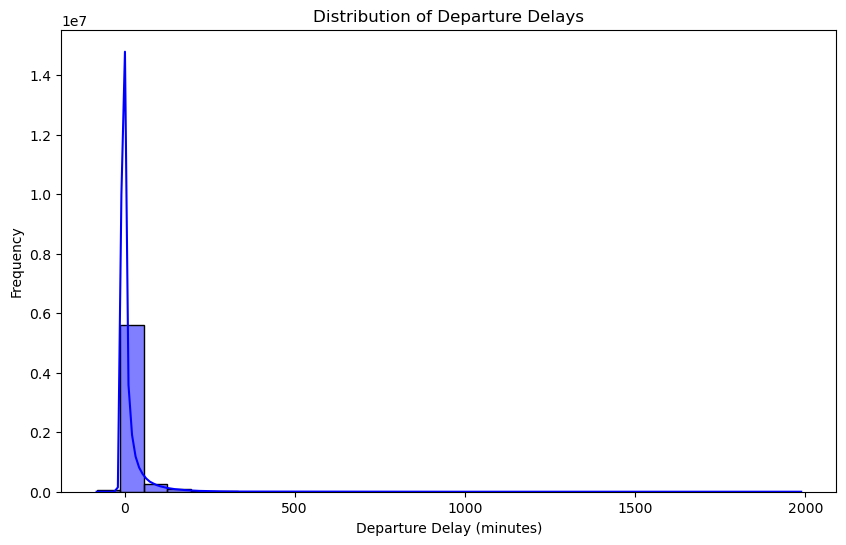

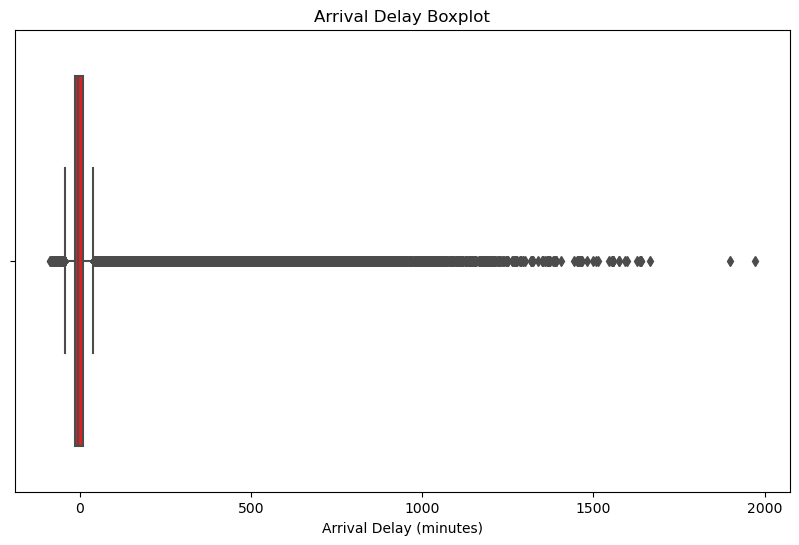

In [43]:
# Histogram for Departure Delay
plt.figure(figsize=(10,6))
sns.histplot(data['DEPARTURE_DELAY'], kde=True, color='blue', bins=30)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Arrival Delay
plt.figure(figsize=(10,6))
sns.boxplot(x=data['ARRIVAL_DELAY'], color='red')
plt.title('Arrival Delay Boxplot')
plt.xlabel('Arrival Delay (minutes)')
plt.show()

##  Flight Routes by Airline

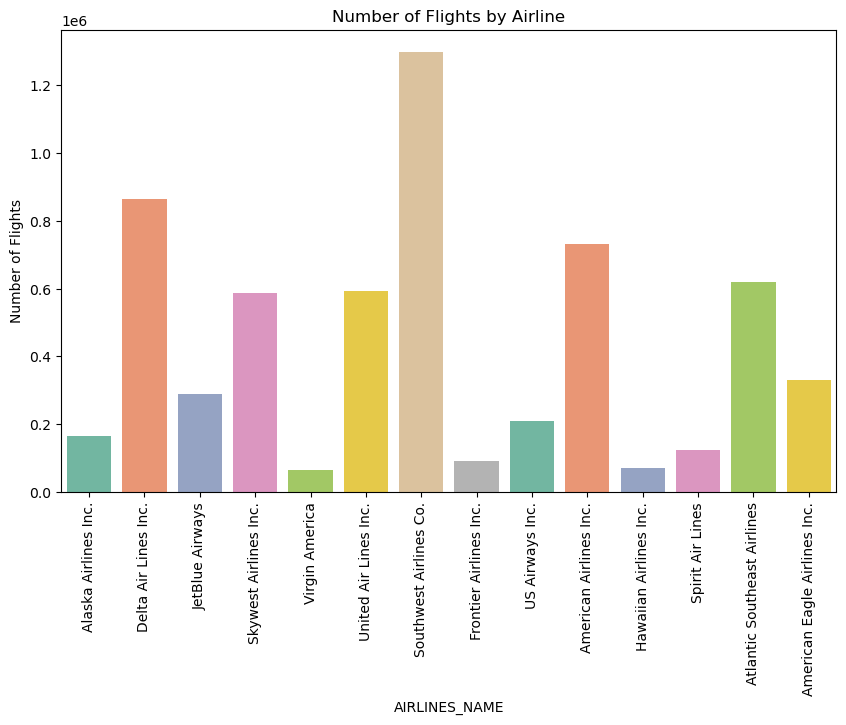

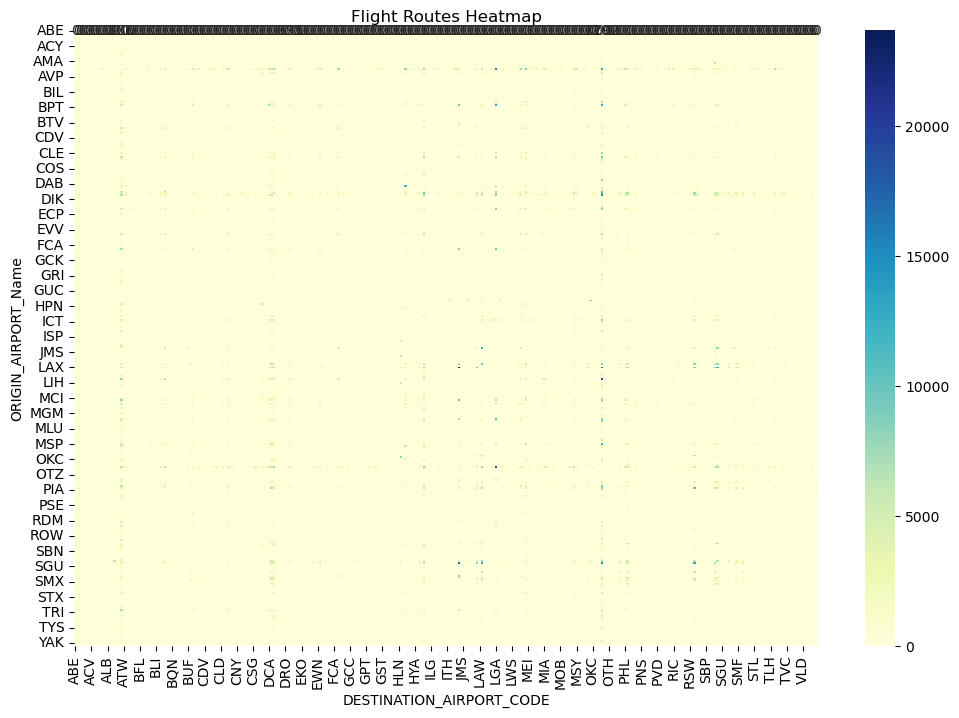

In [44]:
# Number of flights by Airline
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='AIRLINES_NAME', palette='Set2')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=90)
plt.ylabel('Number of Flights')
plt.show()

# Flight routes heatmap
flight_routes = data.groupby(['ORIGIN_AIRPORT_Name', 'DESTINATION_AIRPORT_CODE']).size().reset_index(name='Flight Count')

# Use pivot_table instead of pivot
pivot = flight_routes.pivot_table(index='ORIGIN_AIRPORT_Name', columns='DESTINATION_AIRPORT_CODE', values='Flight Count', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")  # Changed fmt to .0f
plt.title('Flight Routes Heatmap')
plt.show()

## Flight Distance vs. Air Time

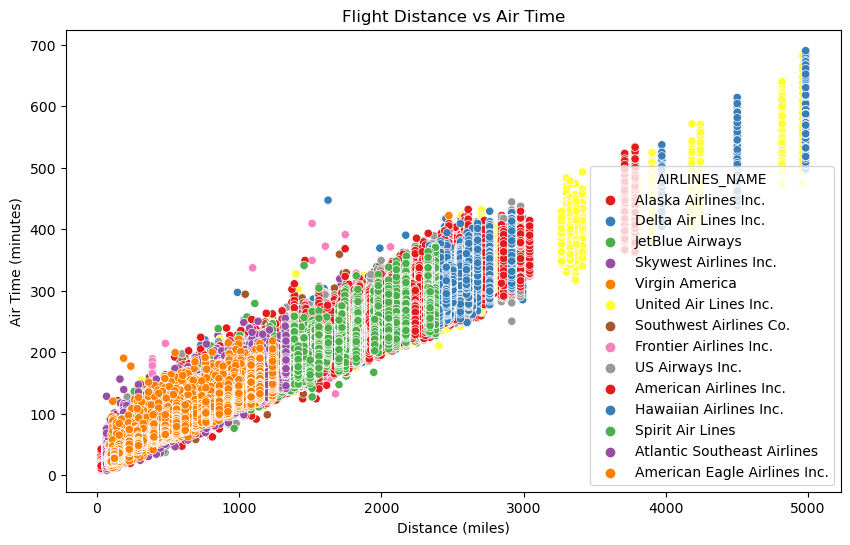

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='DISTANCE', y='AIR_TIME', hue='AIRLINES_NAME', palette='Set1')
plt.title('Flight Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()

## Geographic Flight Distribution

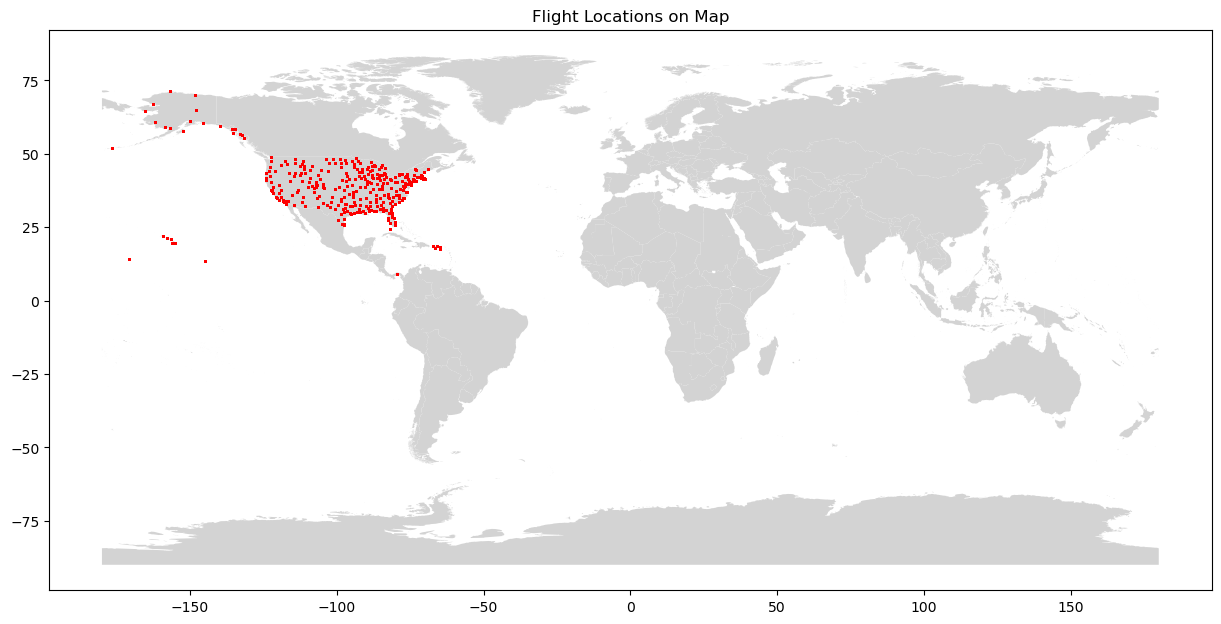

In [48]:
# Creating GeoDataFrame with latitude and longitude from your data
geometry = [Point(xy) for xy in zip(data['Orgin_LONGITUDE'], data['Origin_LATITUDE'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Load world map shapefile
world = gpd.read_file("ne_10m_admin_0_countries_usa.shp")

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot the world map
geo_df.plot(ax=ax, color='red', alpha=0.5, markersize=1)  # Plot flight locations

plt.title('Flight Locations on Map')
plt.show()

## Flight Delays Over Time (Heatmap of Delays by Hour and Day)

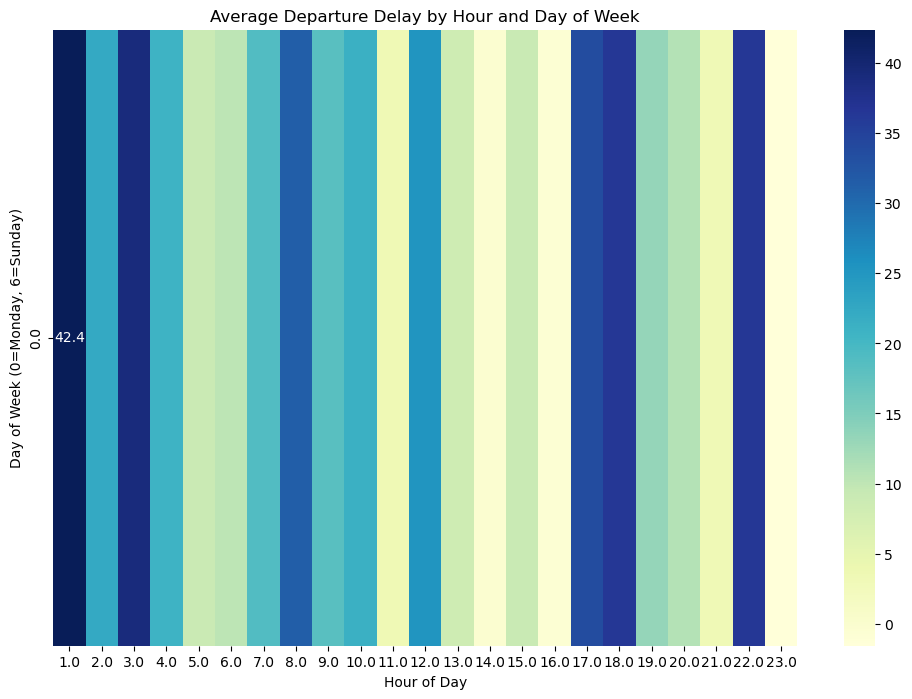

In [49]:
data['SCHEDULED_DEPARTURE'] = pd.to_datetime(data['SCHEDULED_DEPARTURE'], format='%H', errors='coerce')

# Extract hour and day of the week
data['Hour'] = data['SCHEDULED_DEPARTURE'].dt.hour
data['DayOfWeek'] = data['SCHEDULED_DEPARTURE'].dt.dayofweek

# Pivot table for delays by hour and day of the week
delay_heatmap_data = data.pivot_table(index='DayOfWeek', columns='Hour', values='DEPARTURE_DELAY', aggfunc='mean', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(delay_heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Departure Delay by Hour and Day of Week')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.xlabel('Hour of Day')
plt.show()

##  Flight Performance by Airport

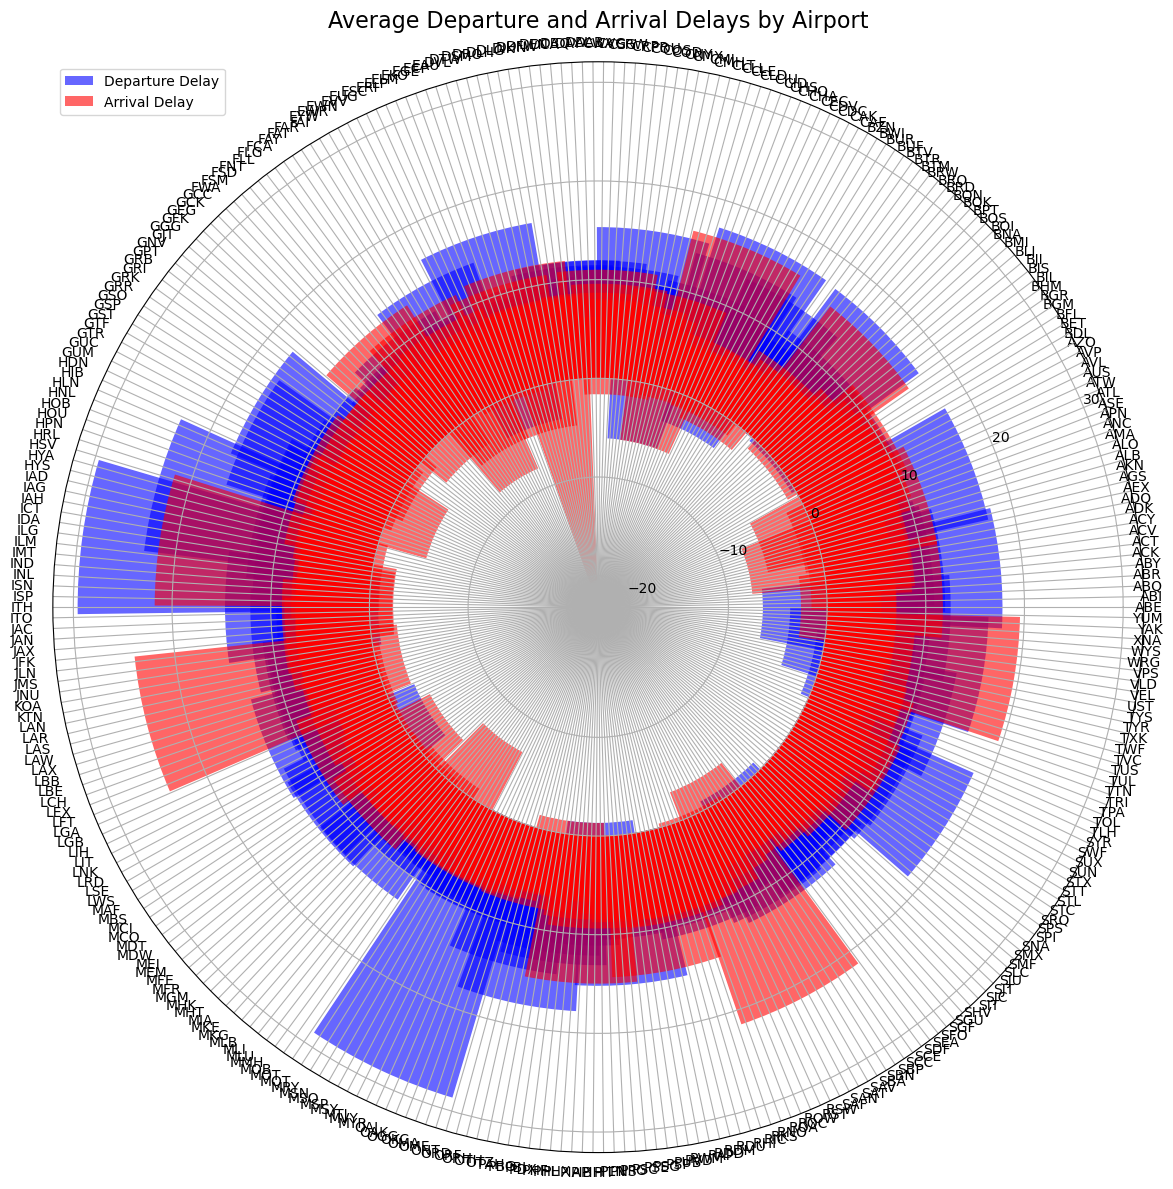

In [50]:
# Calculate average delay for each airport (for both departure and arrival)
airport_delay = data.groupby('ORIGIN_AIRPORT_Name')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()

# Radial Bar chart
airports = airport_delay.index
departure_delays = airport_delay['DEPARTURE_DELAY']
arrival_delays = airport_delay['ARRIVAL_DELAY']

# Set up angle for each airport
angles = np.linspace(0, 2 * np.pi, len(airports), endpoint=False).tolist()

# Convert angles to a NumPy array to enable element-wise operations
angles = np.array(angles)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))  # Increased figure size

# Bar chart for departure delays
ax.bar(angles, departure_delays, width=0.3, label="Departure Delay", color='blue', alpha=0.6)

# Bar chart for arrival delays (offset by pi/8)
ax.bar(angles + np.pi/8, arrival_delays, width=0.3, label="Arrival Delay", color='red', alpha=0.6)

# Set the positions of the ticks and the labels
ax.set_xticks(angles)
ax.set_xticklabels(airports, fontsize=10, rotation=45, ha='right')  # Increased font size and rotated labels for readability
ax.set_title('Average Departure and Arrival Delays by Airport', size=16)
ax.legend(loc='upper left')
plt.tight_layout() 
plt.show()

## Flight Delays Across Airlines (Bubble Chart)

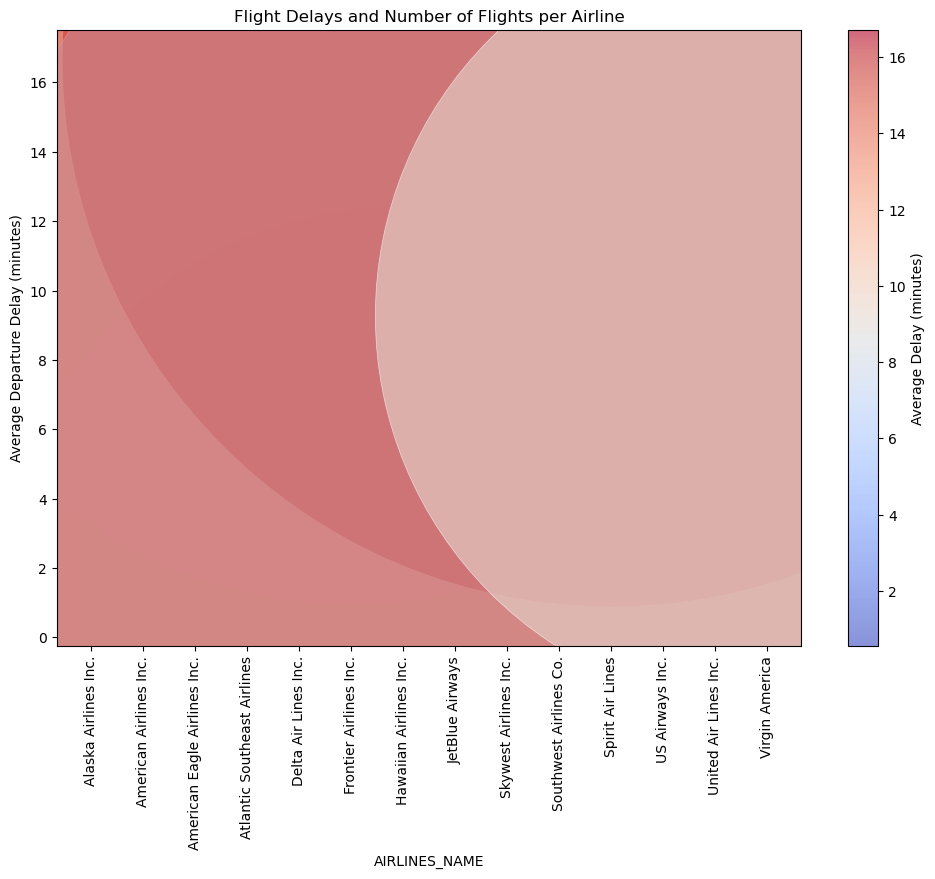

In [51]:
# Calculate the number of flights and average delay for each airline
airline_delay = data.groupby('AIRLINES_NAME').agg({'DEPARTURE_DELAY': 'mean', 'FLIGHT_NUMBER': 'count'}).reset_index()

plt.figure(figsize=(12,8))

# Bubble chart: Bubble size represents the number of flights, and color represents the delay
plt.scatter(airline_delay['AIRLINES_NAME'], airline_delay['DEPARTURE_DELAY'], s=airline_delay['FLIGHT_NUMBER']*5, 
            c=airline_delay['DEPARTURE_DELAY'], cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Flight Delays and Number of Flights per Airline')
plt.xlabel('AIRLINES_NAME')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.colorbar(label='Average Delay (minutes)')
plt.show()

## Airline Performance Map

## Flight Distance vs Delay (Hexbin Plot)

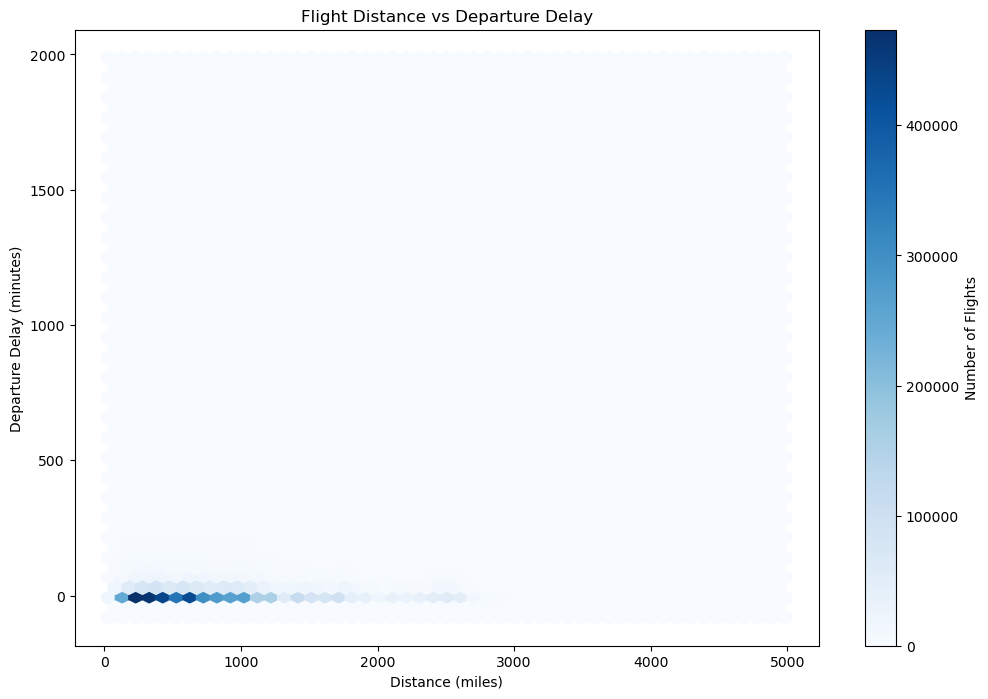

In [52]:
plt.figure(figsize=(12,8))
plt.hexbin(data['DISTANCE'], data['DEPARTURE_DELAY'], gridsize=50, cmap='Blues')
plt.colorbar(label='Number of Flights')
plt.title('Flight Distance vs Departure Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.show()